# Add a new distribution

This package currently implements a limited set of distributions but new ones can be added.

## Remarks

* If you add a distribution please raise an issue on github or submit a pull request so others can profit as well
* Currenly only one covariate can be passed.

## Example: normal distribution non-constant standard deviation

Assuming you want to implement which is a normal distribution with a constant location ($\mu$) and non-constant standard deviation ($\sigma$):

$\mu' = \mu$

$\sigma' = \beta_0 + \beta_1 * cov$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from dist_cov.distributions import distribution_with_covariate

You need to subclass `distribution_with_covariate` and provide the following methods:

* `distribution`: the base distribution
* `param_names`: the name of the parameters
* `get_params`: how to convert the parameters to the ones of the base distribution (must be returned in the order `shape, loc, scale`)
* `_inital_guess`: a starting point for the `fit` method

In [2]:
class norm_std(distribution_with_covariate):
    
    distribution = sp.stats.norm

    @property
    def param_names(self):
        return ["mu", "sigma_b0", "sigma_b1"]

    def get_params(self, args, cov):
        """apply covariates to params

        Parameters
        ----------
        args : parameters
            Parameters of the function.
        cov : float
            Covariate for which to evaluate the parameters

        """

        loc, b0, b1 = np.asarray(args).T
        scale = b0 + b1 * cov

        return loc, scale

    def _inital_guess(self):
        """initial guess of the params for self.fit"""

        return [np.mean(self.data), np.std(self.data), 0]

##  Example

In [3]:
t = np.arange(1, 10, 0.05)

rng = np.random.default_rng()

x = rng.normal(scale=t*0.25, size=t.size)

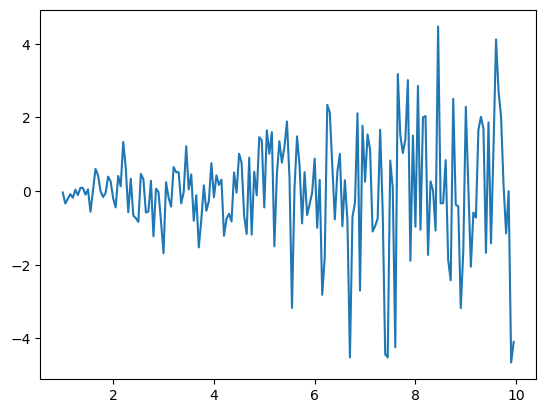

In [4]:
f, ax = plt.subplots()

ax.plot(t, x)

In [5]:
dist = norm_std(data=x, cov=t)

In [6]:
dist.fit()

array([-0.05750726, -0.12155382,  0.26384225])